#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
glass = pd.read_excel('glass.xlsx',sheet_name='glass')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Exploratory Data Analysis

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
cols = glass.columns

#Data Visualization

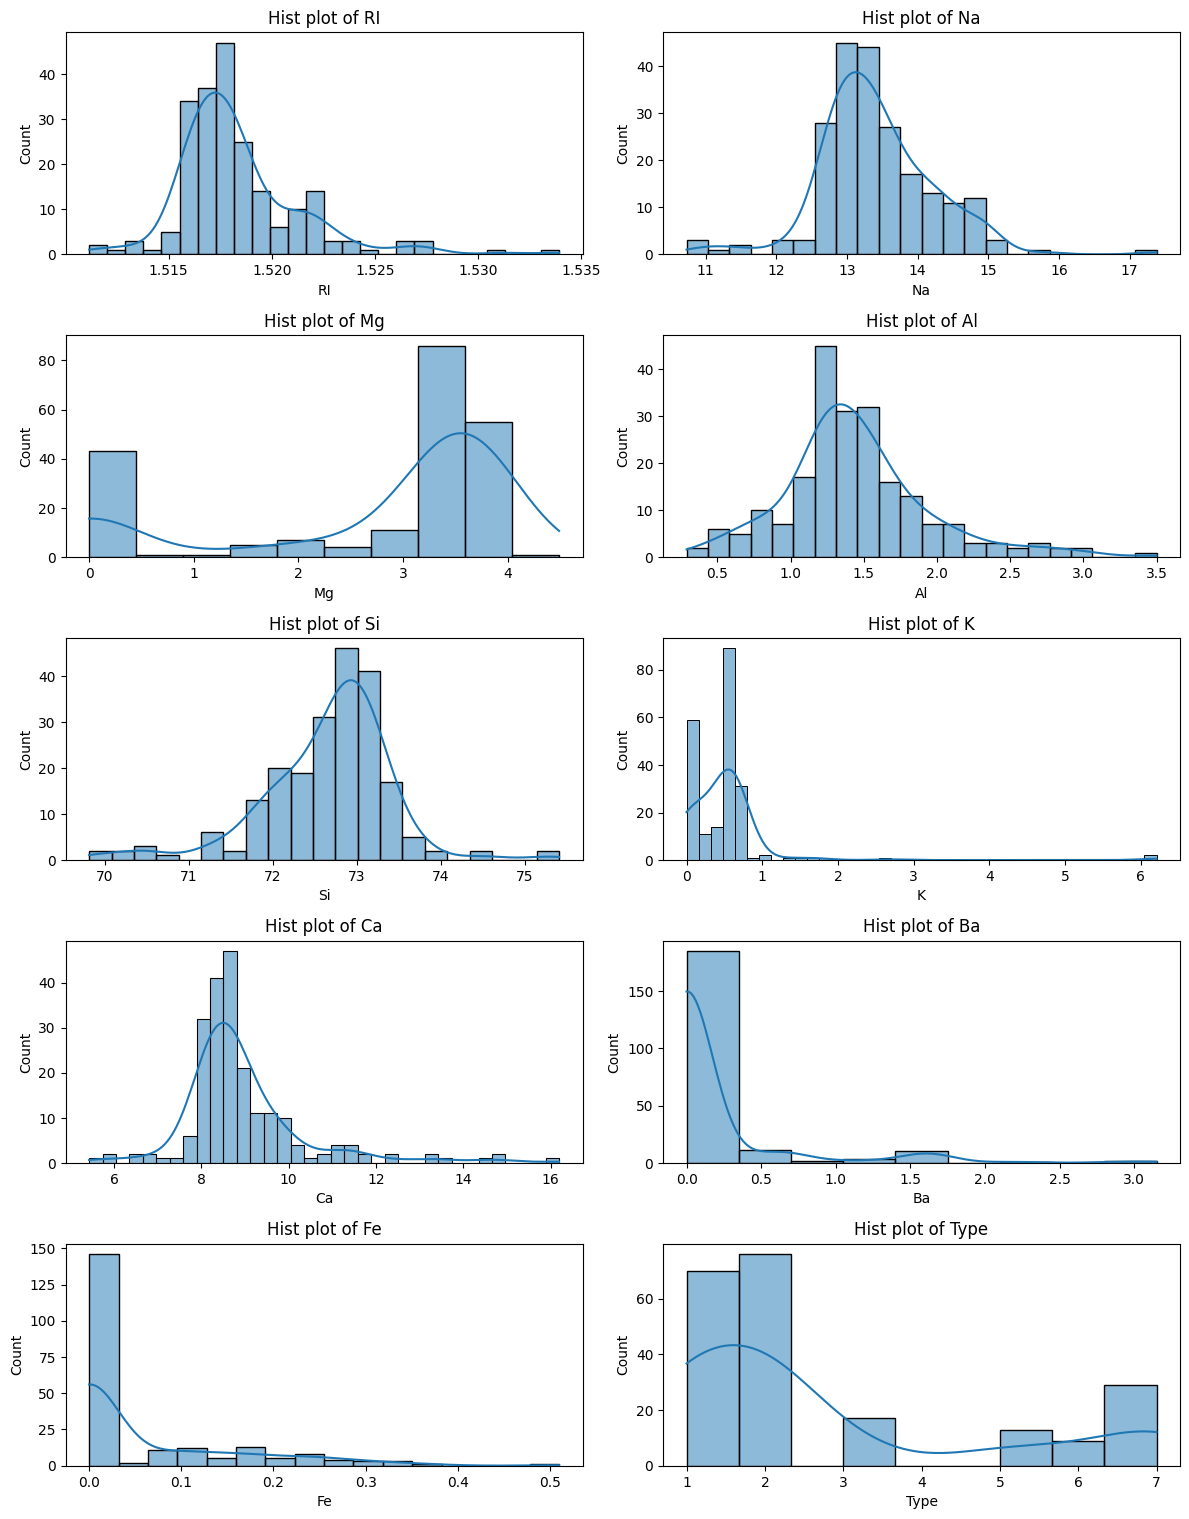

In [9]:
# Plotting Histograms for all features
plt.figure(figsize=(12,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),2,i)
    sns.histplot(data=glass,x=fe,kde=True,palette='viridis')
    plt.title(f"Hist plot of {fe}")
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

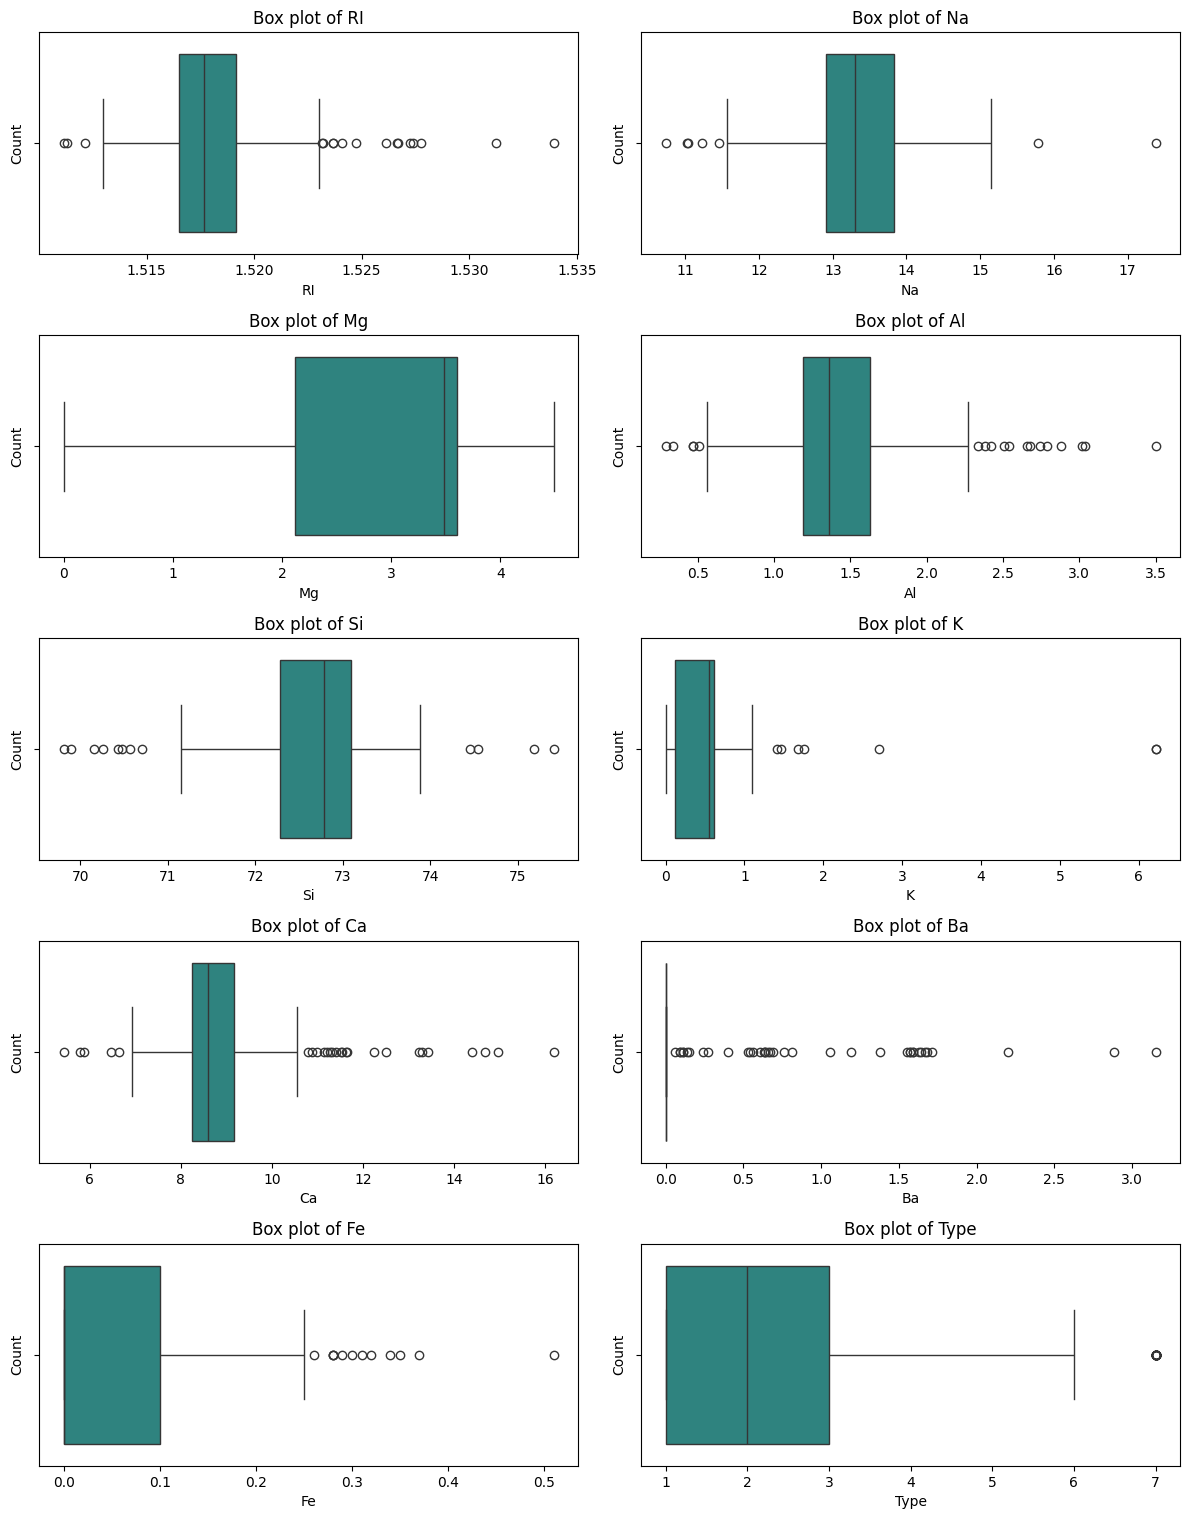

In [10]:
# Plotting box plots for all the features
plt.figure(figsize=(12,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),2,i)
    sns.boxplot(data=glass,x=fe,palette='viridis')
    plt.title(f"Box plot of {fe}")
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

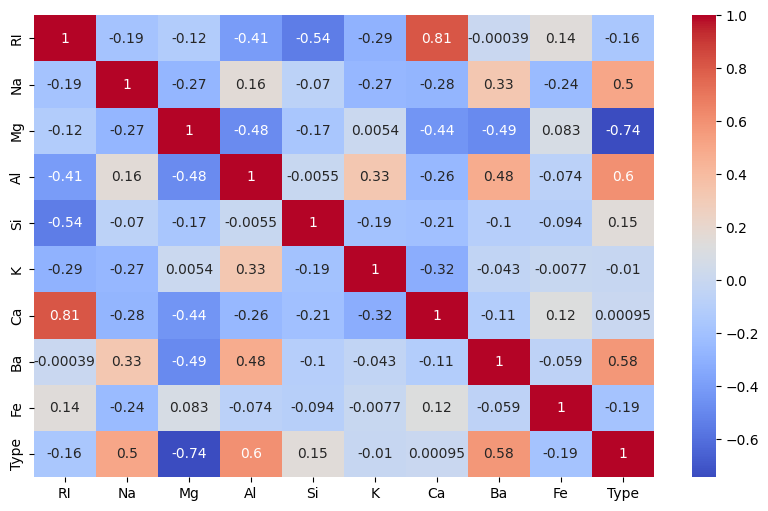

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(glass.corr(), annot=True, cmap='coolwarm')
plt.show()

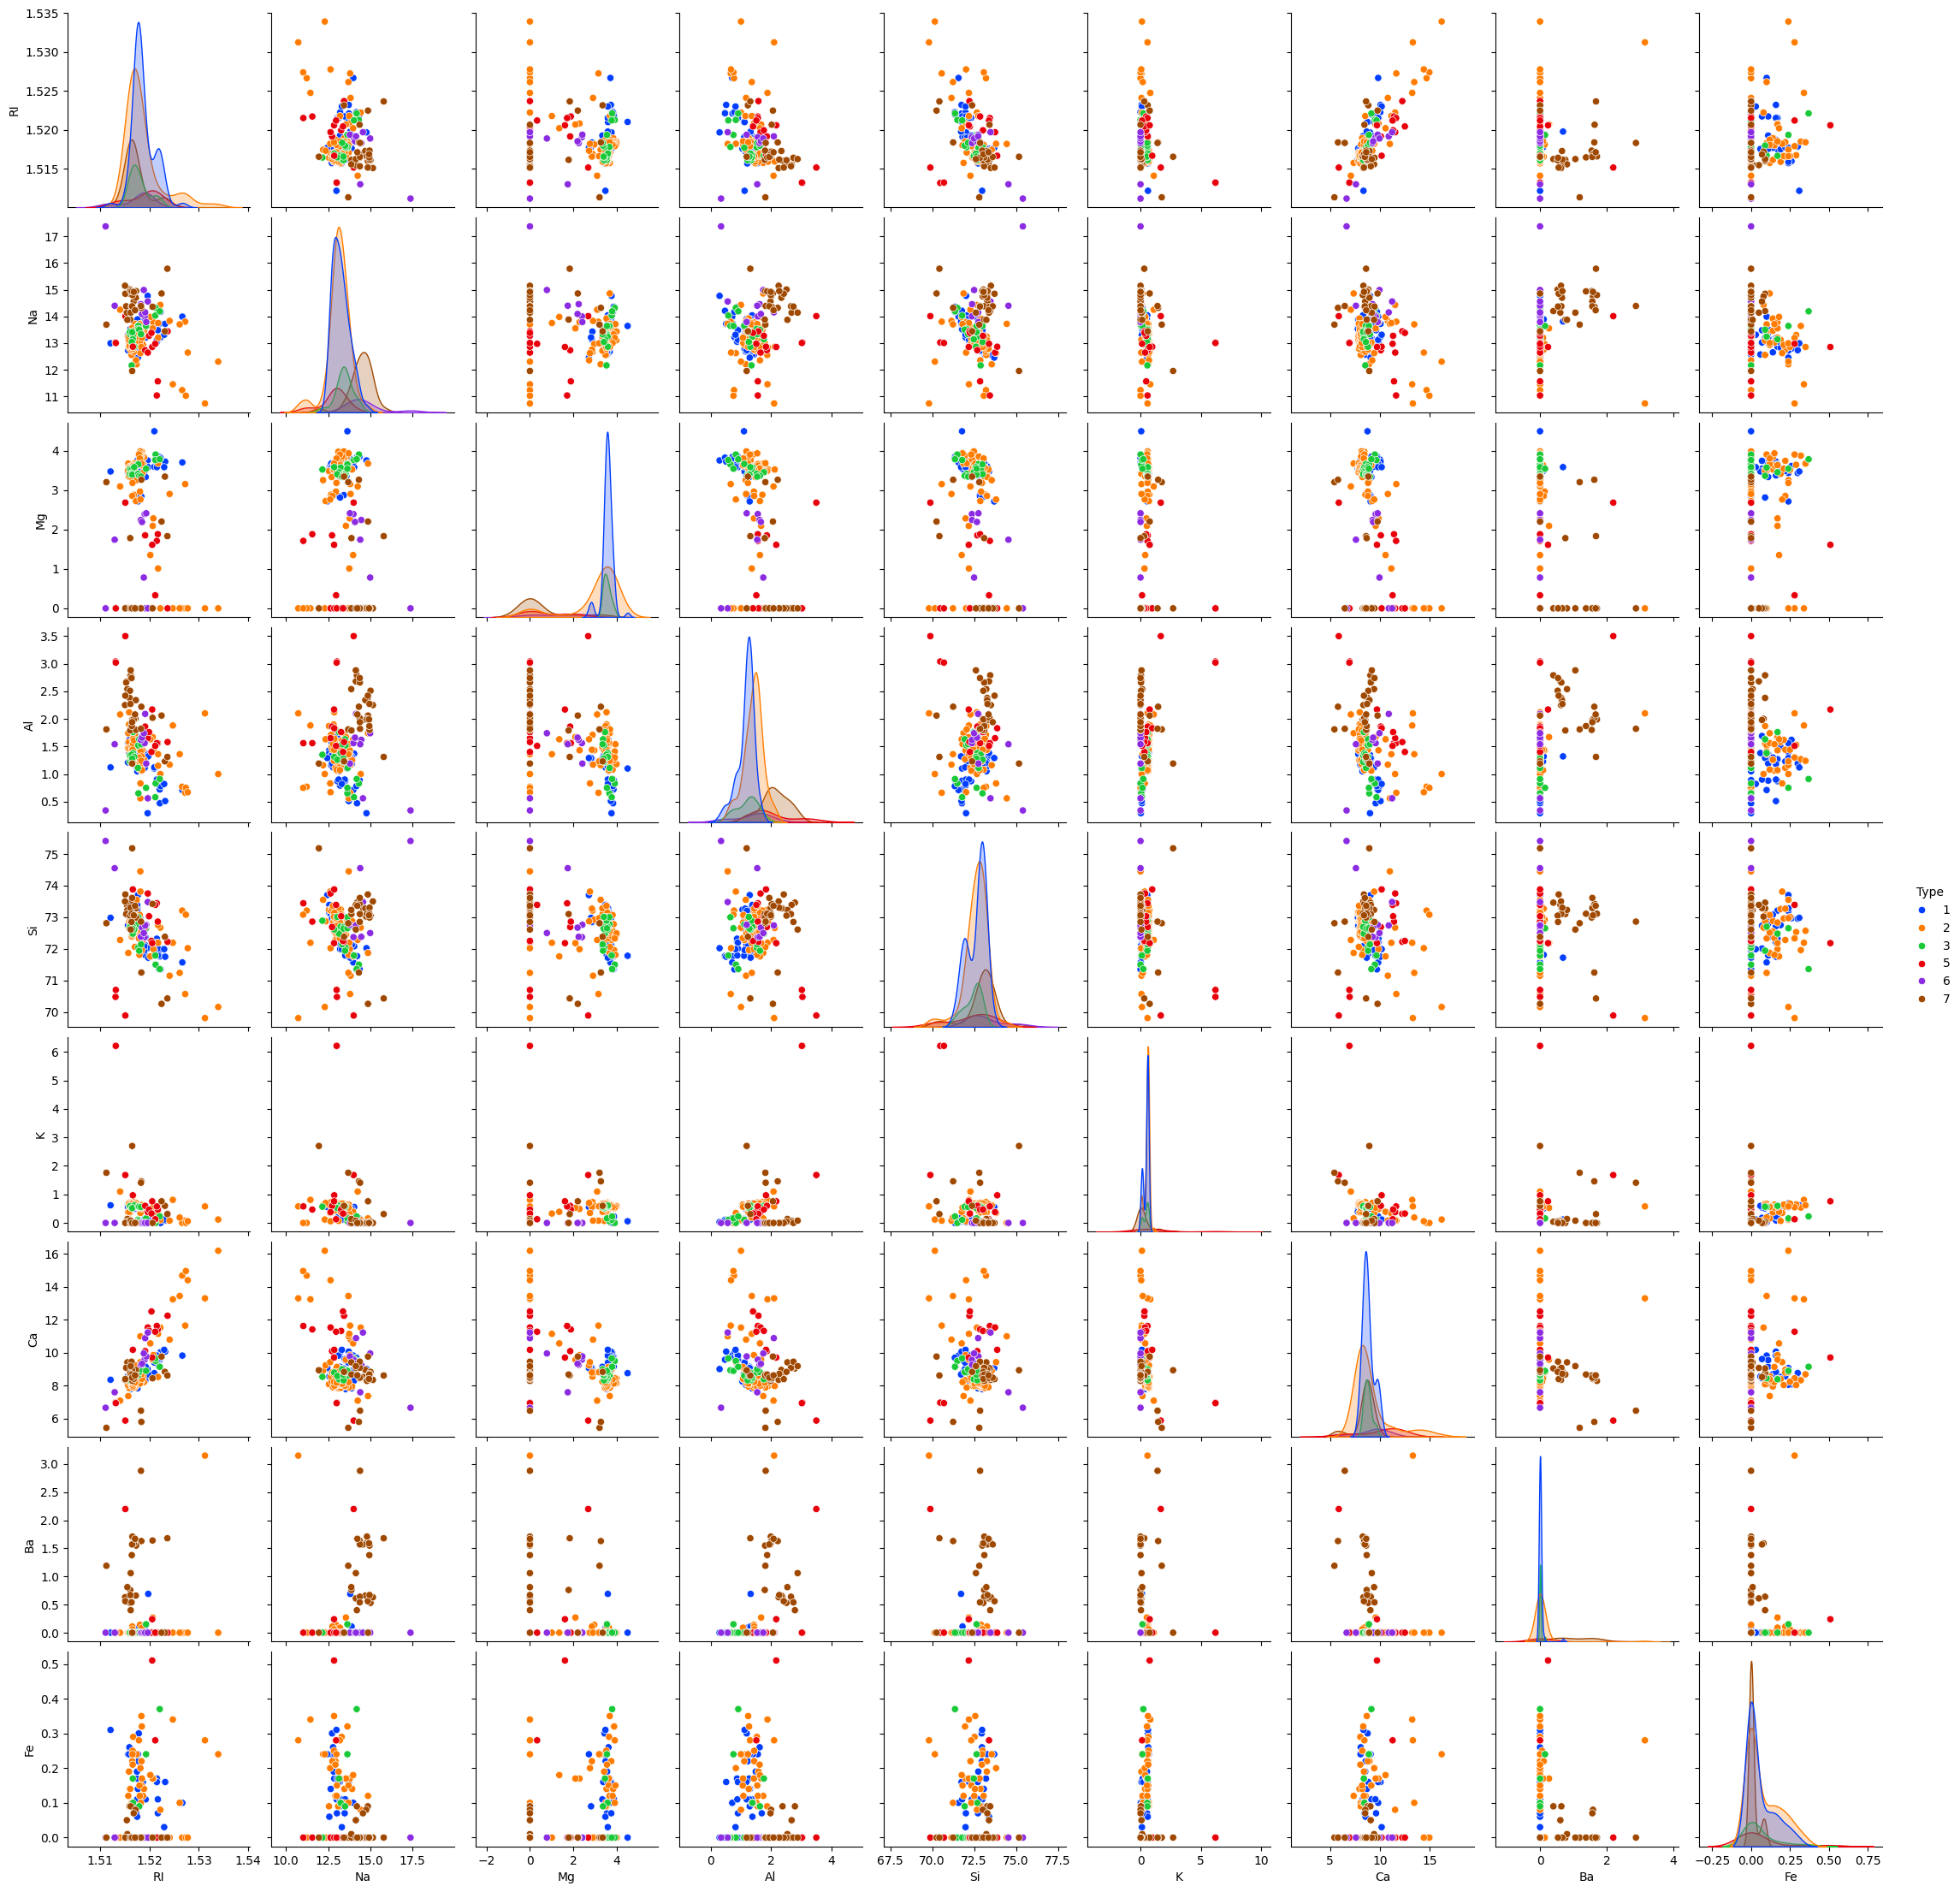

In [12]:
# Pairplot of features
sns.pairplot(glass, hue='Type', palette='bright')
plt.show()

#Data Preprocessing:Train-Test Split

In [13]:
X = glass.drop('Type', axis=1)
y = glass['Type']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Model Implementation

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier(criterion = 'gini',
                           max_depth = 8,
                           min_samples_split = 10,
                           random_state = 42)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [18]:
model.feature_importances_

array([0.12823686, 0.11013443, 0.173172  , 0.17862167, 0.08246588,
       0.07886542, 0.12997244, 0.07868048, 0.03985082])

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0,  0,  0,  0],
       [ 3, 10,  0,  0,  0,  1],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.813953488372093

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(model,X_train,y_train,cv=10)

array([0.72222222, 0.52941176, 0.58823529, 0.76470588, 0.76470588,
       0.82352941, 0.82352941, 0.76470588, 0.70588235, 0.64705882])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.77      0.71      0.74        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.90      0.76      0.78        43
weighted avg       0.84      0.81      0.80        43



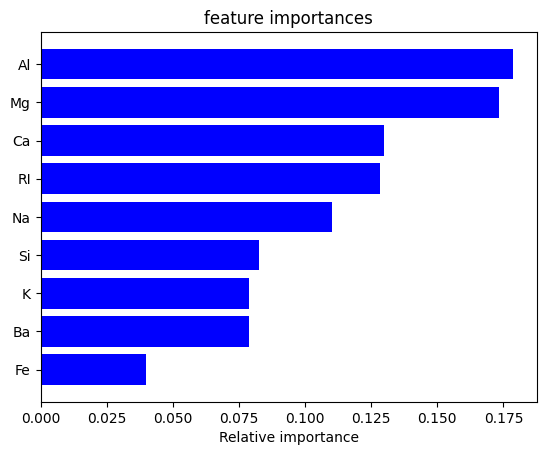

In [28]:
# Plotting feature importance for Random Forest model
features=glass.columns
importances=model.feature_importances_
indices=np.argsort(importances)
plt.title('feature importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [29]:
model_entropy = RandomForestClassifier(criterion = 'entropy',
                           max_depth = 8,
                           min_samples_split = 10,
                           random_state = 42)

In [30]:
model_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=42)

In [31]:
model_entropy.feature_importances_

array([0.10729433, 0.10685231, 0.26815811, 0.17559839, 0.06559141,
       0.07134898, 0.1134824 , 0.06344332, 0.02823074])

In [32]:
pred = model_entropy.predict(X_test)

In [33]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 1, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1])

In [34]:
confusion_matrix(y_test,pred)

array([[10,  1,  0,  0,  0,  0],
       [ 4,  9,  0,  0,  0,  1],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0,  8]])

In [35]:
accuracy_score(y_test,pred)

0.7441860465116279

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.75      0.64      0.69        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.74        43
   macro avg       0.86      0.68      0.71        43
weighted avg       0.79      0.74      0.73        43



In [37]:
# Cross validation for random forest model
cross_val_score(model_entropy, X_train, y_train, cv=10)

array([0.5       , 0.52941176, 0.64705882, 0.76470588, 0.76470588,
       0.82352941, 0.76470588, 0.76470588, 0.58823529, 0.70588235])

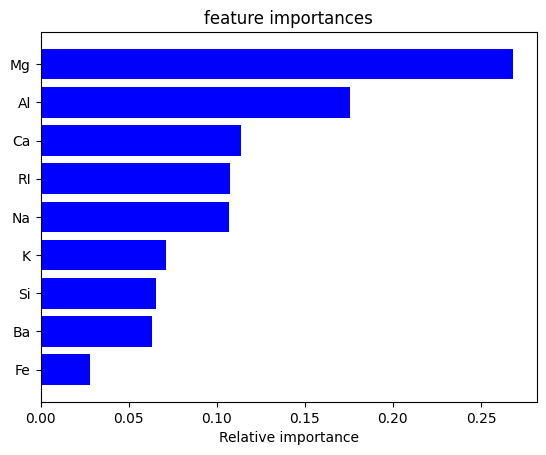

In [38]:
# Plotting feature importance for Random Forest model
features=glass.columns
importances=model_entropy.feature_importances_
indices=np.argsort(importances)
plt.title('feature importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

* The model using the 'gini' criterion achieved a higher accuracy (81.39%) compared to the 'entropy' criterion (74.42%).
* Precision, recall, and f1-scores are slightly better with the gini criterion, especially for more challenging classes (like class 3).

#Bagging with Random Forest

In [40]:
from sklearn.ensemble import BaggingClassifier

In [41]:
# Bagging with Random Forest as the base estimator (using 'estimator' instead of 'base_estimator')
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [42]:
# Predictions and evaluation for Bagging
y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

In [43]:
print(f"Bagging Accuracy: {accuracy_bagging}")

Bagging Accuracy: 0.8604651162790697


#Boosting with AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
# AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [46]:
# Predictions and evaluation for Boosting
y_pred_boosting = adaboost.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)

In [47]:
print(f"AdaBoost Accuracy: {accuracy_boosting}")

AdaBoost Accuracy: 0.4883720930232558


In [48]:
print("\nComparison of Bagging and Boosting Accuracies:")
print(f"Bagging Accuracy: {accuracy_bagging}")
print(f"Boosting Accuracy: {accuracy_boosting}")


Comparison of Bagging and Boosting Accuracies:
Bagging Accuracy: 0.8604651162790697
Boosting Accuracy: 0.4883720930232558


# 1. Explain Bagging and Boosting methods.How is it different from each other.

Bagging and boosting are both ensemble learning techniques used in machine learning to enhance model performance by combining multiple models. However, they operate on different principles and have distinct characteristics.

# Bagging

Bagging aims to reduce variance and improve the stability of machine learning algorithms, particularly decision trees. It does this by creating multiple subsets of the training dataset through random sampling with replacement, known as bootstrap sampling. Each subset is used to train a separate model.

# Boosting

Boosting focuses on reducing bias by sequentially training models where each new model attempts to correct the errors made by the previous ones. It emphasizes misclassified instances by adjusting their weights.

# Key Differences:

* Independence vs. Sequential Dependency: Bagging trains models independently, while Boosting trains models sequentially.
* Focus: Bagging reduces variance, Boosting reduces bias.
* Risk: Bagging has a lower risk of overfitting, whereas Boosting can overfit if not controlled.
* Examples: Bagging includes Random Forests, while Boosting includes AdaBoost and Gradient Boosting.

* Bagging is preferred when dealing with high-variance models that are prone to overfitting, such as complex decision trees.
* Boosting is suitable for models that exhibit high bias, as it iteratively improves model performance by focusing on misclassifications..

# 2. Explain how to handle imbalance in the data.

- Handling imbalanced data is crucial when building machine learning models, especially for classification tasks, because most algorithms assume a relatively even distribution across classes. When one class significantly outnumbers the others, it can lead to biased predictions and poor model performance, particularly on the minority class.
- Here are several techniques to handle imbalance in the data
  1. Resampling Techniques
  2. Use of Different Evaluation Metrics
  3. Cost-Sensitive Learning
  4. Ensemble Methods
  5. Data Augmentation
  6. K-Fold Cross-Validation
  7. Algorithm Selection